# Fake News Datasets

## Introduction
This Jupyter Notebook was created to show basic analysis of public datasets with data for **fake news detection**. Main idea is to make this analysis replicable, so everyone can add his own analysis to those datasets.

### Processed datasets
In this project, following datasets are processed:
* Fake News | Kaggle
* Getting real about Fake News | Kaggle
* Fake News detection | Kaggle
* GeorgeMcIntire/fake_real_news_dataset
* FakeNewsChallenge
* BuzzFeedNews Facebook Facts
* LIAR
* FakeNewsCorpus


## Datasets

At first, import needed python libraries for analysis:

In [31]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fake News | Kaggle
Link: [https://www.kaggle.com/c/fake-news](https://www.kaggle.com/c/fake-news)

**Note:** Repository contains 2 files, **train** and **test** files, but **test** file does not contain labels.

#### Attributes
* **id** - unique ID for a news article
* **title** - the title of a news article
* **author** - author of the news article
* **text** - the text of the article; could be incomplete
* **label** - a label that marks the article as potentially unreliable
    * unreliable
    * reliable

#### Analysis

In [32]:
# read data from dataset
dataset = pd.read_csv('data/kaggle_fake_news/train.csv')

Example of records in dataset

In [33]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Count of records

In [34]:
len(dataset)

20800

Distribution of labels

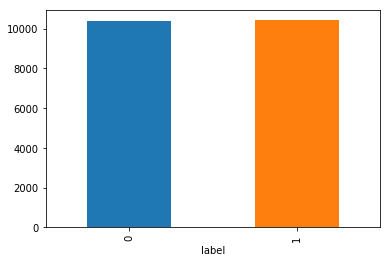

In [35]:
dataset.groupby('label').count()['id'].plot.bar()

### Getting real about Fake News | Kaggle
Link: [https://www.kaggle.com/mrisdal/fake-news](https://www.kaggle.com/mrisdal/fake-news)

The latest hot topic in the news is fake news and many are wondering what data scientists can do to detect it and stymie its viral spread. This dataset is only a first step in understanding and tackling this problem. It contains text and metadata scraped from 244 websites tagged as "bullshit" by the BS Detector Chrome Extension by Daniel Sieradski.

#### Attributes
* **uuid** - unique identifier
* **ord_in_thread**
* **author** - author of story
* **published** - date published
* **title** - title of the story
* **text** - text of story
* **language** - data from webhose.io
* **crawled** - date the story was archived
* **site_url** - site URL from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json)
* **country** - data from webhose.io
* **domain_rank** - data from webhose.io
* **thread_title**
* **spam_score** - data from webhose.io
* **main_img_url** - image from story
* **replies_count** - number of replies
* **participants_count** - number of participants
* **likes** - number of Facebook likes
* **comments** - number of Facebook comments
* **shares** - number of Facebook shares
* **type** - type of website (label from [BS detector](https://github.com/bs-detector/bs-detector/blob/dev/ext/data/data.json))

#### Analysis

In [36]:
# read data from dataset
dataset = pd.read_csv('data/kaggle_getting_real_about_fake_news/data.csv')

Example of records in dataset

In [37]:
dataset.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


Count of records

In [38]:
len(dataset)

12999

Distribution of labels

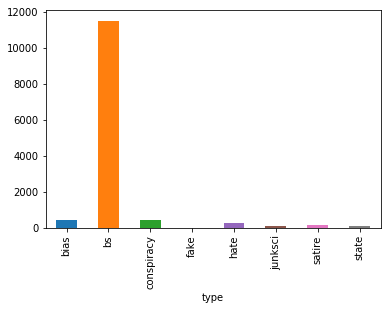

In [39]:
dataset.groupby('type').count()['uuid'].plot.bar()

### Fake News detection | Kaggle
Link: [https://www.kaggle.com/jruvika/fake-news-detection](https://www.kaggle.com/jruvika/fake-news-detection)

#### Analysis

In [40]:
# read data from dataset
dataset = pd.read_csv('data/kaggle_fake_news_detection/data.csv')

Example of records in dataset

In [41]:
dataset.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


Count of records

In [42]:
len(dataset)

4009

Distribution of labels

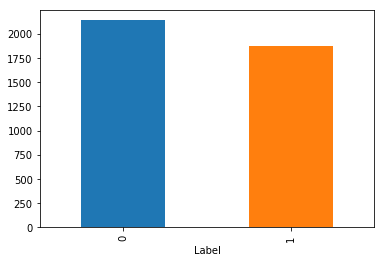

In [43]:
dataset.groupby('Label').count()['URLs'].plot.bar()

### GeorgeMcIntire/fake_real_news_dataset
Link: [https://github.com/GeorgeMcIntire/fake_real_news_dataset](https://github.com/GeorgeMcIntire/fake_real_news_dataset)

#### Analysis

In [44]:
# read data from dataset
dataset = pd.read_csv('data/georgemcintire_fake_real_news_dataset/data.csv')

### FakeNewsChallenge
Link: [https://github.com/FakeNewsChallenge/fnc-1](https://github.com/FakeNewsChallenge/fnc-1)

#### Analysis

In [45]:
# read data from dataset
dataset = pd.read_csv('data/fake_news_challenge/train_bodies.csv')

### BuzzFeedNews Facebook Facts
Link: [https://github.com/BuzzFeedNews/2016-10-facebook-fact-check](https://github.com/BuzzFeedNews/2016-10-facebook-fact-check)

#### Analysis

In [46]:
# read data from dataset
dataset = pd.read_csv('data/buzzfeednews_facebook_facts/data.csv')

### LIAR
Link: [https://www.cs.ucsb.edu/~william/data/liar_dataset.zip](https://www.cs.ucsb.edu/~william/data/liar_dataset.zip)

### FakeNewsCorpus
Link: [https://github.com/several27/FakeNewsCorpus](https://github.com/several27/FakeNewsCorpus)